Partie 1: Mécanique céleste

In [32]:
import numpy as np
from astropy.constants import G, M_earth, M_sun 
import matplotlib.pyplot as plt

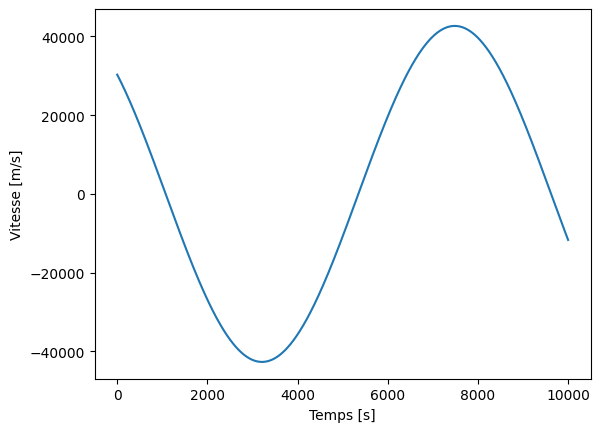

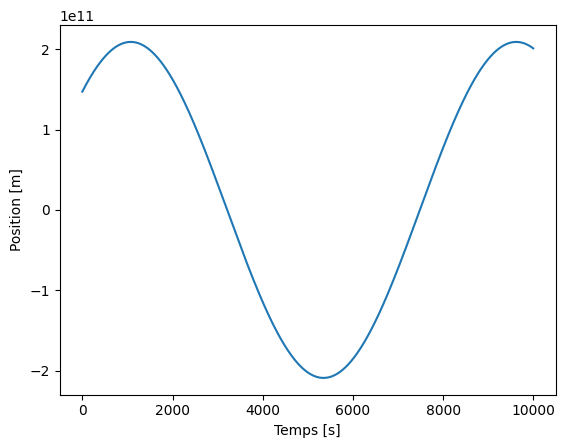

In [33]:
#a) Calcul de la méthode de Verlet
r_0 = 1.4710e11 # m
v_0 = 3.0287e4 #m/s

def f(r):
    return(-G.value * M_sun.value * r/r_0**3)

def verlet(r_0, v_0, h, max):
    v_h = [v_0]
    r_h = [r_0]
    v_1 =  v_0 + 0.5 * h * f(r_0)
    r = r_0

    for i in range(1, max):
        r = r + h * v_1
        k = h * f(r)
        v_2 = v_1 + 0.5 * k 
        v_1 = v_1 + k
        v_h.append(v_2)
        r_h.append(r)
         

    return(v_h, r_h)
pas = 10000
v_h, r_h = verlet(r_0, v_0, 3600, pas)
plt.figure()
plt.plot(range(pas), v_h)
plt.ylabel("Vitesse [m/s]")
plt.xlabel("Temps [s]")
plt.show()

plt.figure()
plt.plot(range(pas), r_h)
plt.ylabel("Position [m]")
plt.xlabel("Temps [s]")
plt.show()


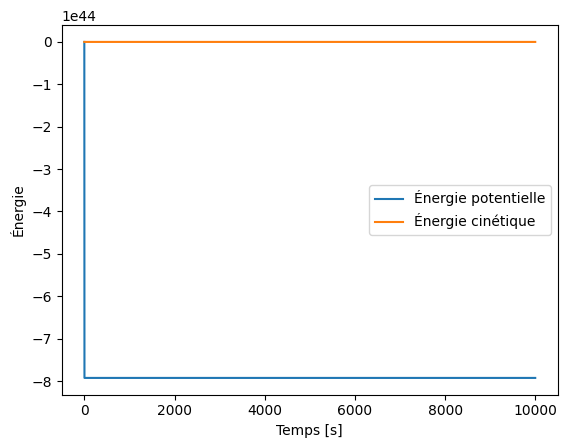

In [47]:
#b)

def verlet(r_0, v_0, h, max):
    v_h = [v_0]
    r_h = [r_0]
    U = [-G.value*M_sun.value*M_earth.value/r_0]
    E_k = [1/2*M_earth.value*v_0**2]
    E_tot = [U[0]+E_k[0]]
    
    v_1  =  v_0 + 0.5 * h * f(r_0)
    r = r_0

    for i in range(1, max):
        r = r + h * v_1
        if  abs(r) < 10: 
            r = 10
        k = h * f(r)
        v_2 = v_1 + 0.5 * k 
        v_1 = v_1 + k

        v_h.append(v_2)
        r_h.append(r)
 
        E_k.append(1/2*M_earth.value*v_2**2)
        U.append(-G.value*M_sun.value*M_earth.value)
        E_tot.append(U[i] + E_k[i])
    return(U, E_k, E_tot)


U, E_k, E_tot = verlet(r_0, v_0, 3600, pas)



plt.figure()
plt.plot(range(pas), U, label= "Énergie potentielle")
plt.plot(range(pas), E_k, label= "Énergie cinétique")
#plt.plot(range(pas), E_tot, label= "Énergie totale")
plt.ylabel("Énergie")
plt.xlabel("Temps [s]")
plt.legend()
plt.show()



